## Titanic ML Classifier Modelling

We will use the Titanic Dataset from Kaggle

## Content

Survived: Survived (1) or died (0)  
Pclass: Passenger’s class  
Name: Passenger’s name  
Sex: Passenger’s sex  
Age: Passenger’s age  
SibSp: Number of siblings/spouses aboard  
Parch: Number of parents/children aboard  
Ticket: Ticket number  
Fare: Fare  
Cabin: Cabin  
Embarked: Port of embarkation  



### Importing Necessary Libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

### Importing Dataframe

In [2]:
path = 'train_titanic.csv'
raw = pd.read_csv(path)
raw.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

In [4]:
count_no_sub = (len(raw[raw['Survived']==0]))
count_sub = (len(raw[raw['Survived']==1]))
print("Total Passengers Embarked (Train Set)", count_no_sub+count_sub)
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Passengers Died", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Passengers Survived", pct_of_sub*100)

Total Passengers Embarked (Train Set) 891
Passengers Died 61.61616161616161
Passengers Survived 38.38383838383838


In [5]:
raw.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [6]:
raw.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [7]:
raw['Pclass'].value_counts(1)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [8]:
raw['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

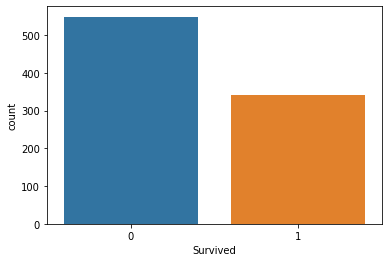

In [9]:
sns.countplot(x='Survived', data=raw)

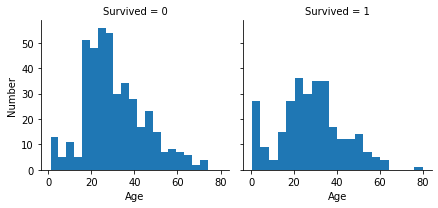

In [10]:
age_hist = sns.FacetGrid(raw, col='Survived')
age_hist.map(plt.hist, 'Age', bins=20)
age_hist.set_ylabels('Number')

C:\Users\saads\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


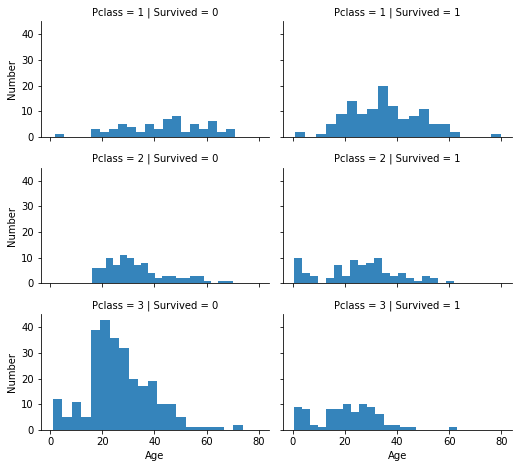

In [11]:
pclass_age_grid = sns.FacetGrid(raw, col='Survived', row='Pclass', size=2.2, aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', alpha=0.9, bins=20)
pclass_age_grid.add_legend()
pclass_age_grid.set_ylabels('Number')

C:\Users\saads\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


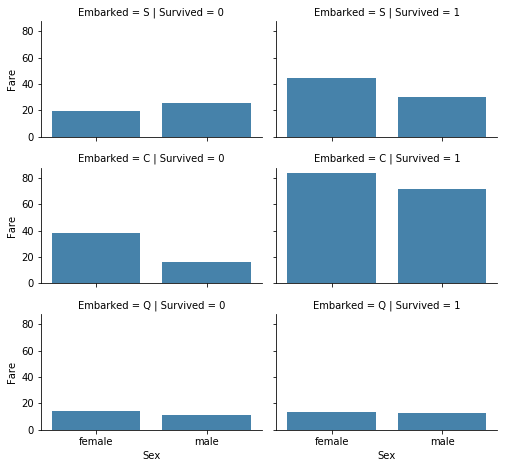

In [12]:
grid = sns.FacetGrid(raw, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.9, ci=None)
grid.add_legend()

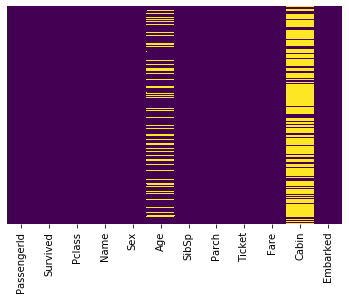

In [13]:
sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# heatmap shows missing values

C:\Users\saads\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


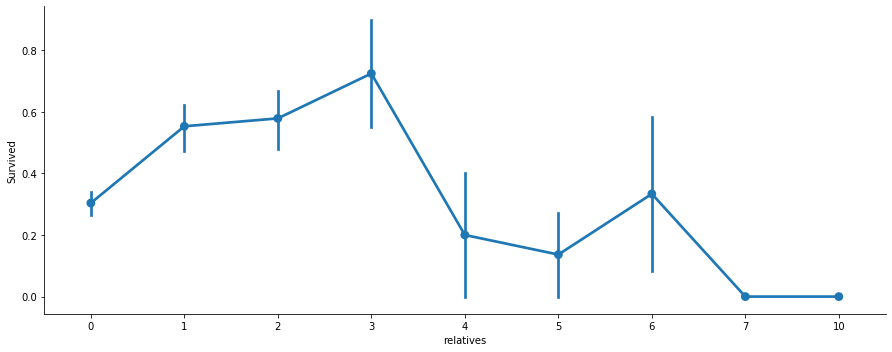

In [14]:
data = [raw]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
raw['not_alone'].value_counts()
axes = sns.factorplot('relatives','Survived', 
                      data=raw, aspect = 2.5, )

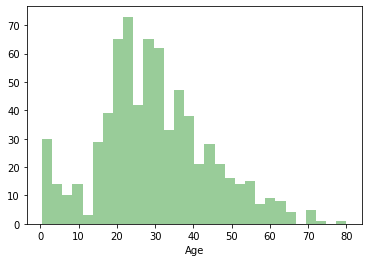

In [15]:
#distribution plot of age of the people
sns.distplot(raw['Age'].dropna(), kde=False, bins=30, color='Green')

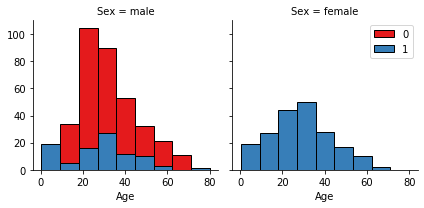

In [16]:
bins = np.linspace(raw.Age.min(), raw.Age.max(), 10)
g = sns.FacetGrid(raw, col="Sex", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

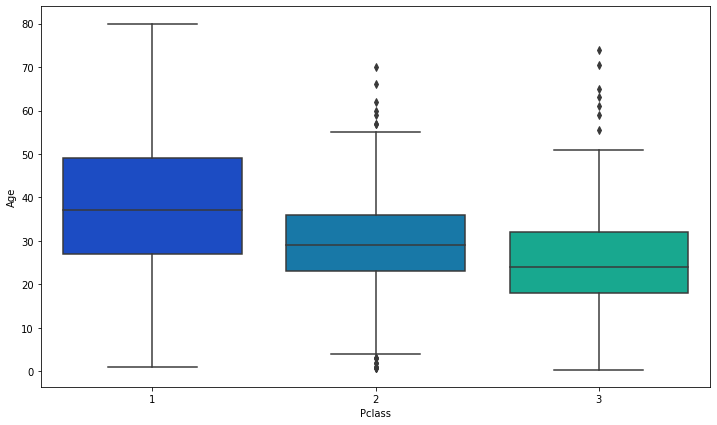

In [17]:
#boxplot with age on y-axis and Default rate on x-axis.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=raw,palette='winter')

### Data Wrangling

In [21]:
raw.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)

In [45]:
age_mean = raw['Age'].mean()
raw['Age'].fillna(age_mean, inplace=True)
raw['Age'].isnull().sum()

0

In [51]:
#raw['Embarked'].fillna('S', inplace = True)
raw['Embarked'].isnull().sum()

0

In [134]:
#Feature = raw[['Pclass','Sex','Embarked']]
#Feature = pd.get_dummies(Feature, drop_first = True)
#Feature.head()
#Feature = pd.concat([Feature, raw] , axis=1)
Feature.head()
#raw.drop(['Pclass','Embarked','Sex'], axis=1, inplace = True)

,Pclass,Sex_male,Embarked_Q,Embarked_S
0,3,1,1,0
1,3,0,0,1
2,2,1,1,0
3,3,1,0,1
4,3,0,0,1


### Defining Target & Features and Creating Train Test Splits

In [57]:
y = Feature['Survived']
X = Feature.drop(['Survived'], axis =1)

In [139]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [58]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### KNN ML Modeling and Accuracy Testing

Test set Accuracy at k= 1 :  0.7350746268656716
Test set Accuracy at k= 2 :  0.7574626865671642
Test set Accuracy at k= 3 :  0.7761194029850746
Test set Accuracy at k= 4 :  0.7798507462686567
Test set Accuracy at k= 5 :  0.7798507462686567
Test set Accuracy at k= 6 :  0.7611940298507462
Test set Accuracy at k= 7 :  0.7649253731343284
Test set Accuracy at k= 8 :  0.7798507462686567
Test set Accuracy at k= 9 :  0.7835820895522388


C:\Users\saads\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\saads\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\saads\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior 

Text(0, 0.5, 'Testing Accuracy')

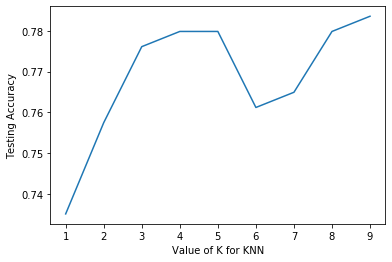

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    knn_yhat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", jaccard_similarity_score(y_test, knn_yhat))
    accuracy_score.append(jaccard_similarity_score(y_test, knn_yhat))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

from sklearn import metrics
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    knn_yhat=KNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, knn_yhat)
    
    std_acc[n-1]=np.std(knn_yhat==y_test)/np.sqrt(knn_yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "Best accuracy:", mean_acc.max(), "k=", mean_acc.argmax()+1)

In [61]:
import statsmodels.api as sm
k = 9
KNN = KNeighborsClassifier(n_neighbors = k).fit(X, y)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

### Decision Tree ML Modeling and Accuracy Testing

In [62]:
# findinng the best depth level
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

# Compare accuracy result for depth = 3, 4 and 5
d_range = range(3, 6)
f1 = []
ja = []
for d in d_range:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    DT.fit(X_train, y_train)
    dt_yhat = DT.predict(X_test)
    f1.append(f1_score(y_test, dt_yhat, average='weighted'))
    ja.append(jaccard_similarity_score(y_test, dt_yhat))

result = pd.DataFrame(f1, index=['d=3','d=4', 'd=5'])
result.columns = ['F1-score']
result.insert(loc=1, column='Jacard', value=ja)
result.columns.name = "Depth"
result

C:\Users\saads\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\saads\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\saads\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior 

Depth,F1-score,Jacard
d=3,0.819697,0.820896
d=4,0.812433,0.820896
d=5,0.822783,0.824627


In [63]:
# for Decision Trees
from sklearn.tree import DecisionTreeClassifier
# prepare DT setting
DT = DecisionTreeClassifier(criterion="entropy", max_depth=5)
# perform the test
DT.fit(X, y)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### SVM ML Modeling and Accuracy Testing

In [64]:
# for SVM
from sklearn import svm
# prepare SVM setting
SVM = svm.SVC(kernel='rbf')
# perform the test
SVM.fit(X, y)
SVM



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Logistic Regression ML Modeling and Accuracy Testing

Test  0 : Accuracy at c = 0.1 solver= newton-cg is :  0.43912798437177786
Test  1 : Accuracy at c = 0.1 solver= lbfgs is :  0.43912792170498216
Test  2 : Accuracy at c = 0.1 solver= liblinear is :  0.4407080478635776
Test  3 : Accuracy at c = 0.1 solver= sag is :  0.43913309595403827
Test  4 : Accuracy at c = 0.1 solver= saga is :  0.4391270349660856
Test  5 : Accuracy at c = 0.01 solver= newton-cg is :  0.4818008017390297
Test  6 : Accuracy at c = 0.01 solver= lbfgs is :  0.48180056543710176
Test  7 : Accuracy at c = 0.01 solver= liblinear is :  0.49197913621794476
Test  8 : Accuracy at c = 0.01 solver= sag is :  0.48180743160511147
Test  9 : Accuracy at c = 0.01 solver= saga is :  0.4818017391128959
Test  10 : Accuracy at c = 0.001 solver= newton-cg is :  0.6009436486500108
Test  11 : Accuracy at c = 0.001 solver= lbfgs is :  0.6009437946496796
Test  12 : Accuracy at c = 0.001 solver= liblinear is :  0.6267269811872547
Test  13 : Accuracy at c = 0.001 solver= sag is :  0.600949762768

Text(0, 0.5, 'Testing Accuracy')

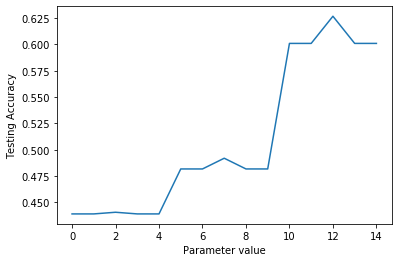

In [65]:
# for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

c_list = [0.1, 0.01, 0.001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
idx = []

accuracy_score = []
for idx1, c in enumerate(c_list):
    for idx2, sol in enumerate(solver_list):
        idx.append(idx2 + idx1 * 5)
        # perform the test
        LR = LogisticRegression(C=c, solver=sol).fit(X_train, y_train)
        # it can predict the outcome
        lr_yhat = LR.predict(X_test)
        lr_prob = LR.predict_proba(X_test)
        print("Test ", (idx2 + idx1 * 5), ": Accuracy at c =", c,"solver=", sol,
              "is : ", log_loss(y_test, lr_prob))
        accuracy_score.append(log_loss(y_test, lr_prob))
lr_prob = LR.predict_proba(X_test)
log_loss(y_test, lr_prob)
# plot the relationship between K and testing accuracy
plt.plot(idx, accuracy_score)
plt.xlabel('Parameter value')
plt.ylabel('Testing Accuracy')

In [66]:
# for Logistic Regression
from sklearn.linear_model import LogisticRegression
# prepare LR setting
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X, y)
LR

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Importing Test set and wrangling it to fit to Train set

In [99]:
raw_test = pd.read_csv('test_titanic.csv')
raw_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
data = [raw_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
raw_test['not_alone'].value_counts()


1    253
0    165
Name: not_alone, dtype: int64

In [102]:
raw_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
relatives        0
not_alone        0
dtype: int64

In [103]:
raw_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch','Ticket','Cabin'], axis = 1, inplace =True)

In [105]:
raw_test['Fare'].fillna(raw_test['Fare'].mean(), inplace=True )
raw_test.isnull().sum()

Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
relatives    0
not_alone    0
dtype: int64

In [113]:
#Feature1 = raw_test[['Pclass','Sex','Embarked']]
#Feature1 = pd.get_dummies(Feature1, drop_first = True)
#Feature1.head()
#Feature1 = pd.concat([Feature1, raw_test] , axis=1)
Feature1.head()
#raw_test.drop(['Pclass','Embarked','Sex'], axis=1, inplace = True)
#raw_test.head()

,Pclass,Sex_male,Embarked_Q,Embarked_S,Age,Fare,relatives,not_alone
0,3,1,1,0,34.5,7.8292,0,1
1,3,0,0,1,47.0,7.0000,1,0
2,2,1,1,0,62.0,9.6875,0,1
3,3,1,0,1,27.0,8.6625,0,1
4,3,0,0,1,22.0,12.2875,2,0


In [132]:
X_test = Feature1

In [140]:
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [120]:
y_test = pd.read_csv('gender_submission.csv')
y_test.drop(['PassengerId'], axis = 1, inplace = True)
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [142]:
# Jaccard setup
from sklearn.metrics import jaccard_similarity_score

# evaluate KNN
knn_yhat = KNN.predict(X_test)
jc1 = round(jaccard_similarity_score(y_test, knn_yhat), 2)
# evaluate Decision Trees
dt_yhat = DT.predict(X_test)
jc2 = round(jaccard_similarity_score(y_test, dt_yhat), 2)
#evaluate SVM
svm_yhat = SVM.predict(X_test)
jc3 = round(jaccard_similarity_score(y_test, svm_yhat), 2)
# evaluate Logistic Regression
lr_yhat = LR.predict(X_test)
jc4 = round(jaccard_similarity_score(y_test, lr_yhat), 2)

list_jc = [jc1, jc2, jc3, jc4]
list_jc

C:\Users\saads\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\saads\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\saads\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior 

[0.9, 0.93, 0.92, 0.91]

In [143]:
# F1-score setup
from sklearn.metrics import f1_score

# evaluate KNN
fs1 = round(f1_score(y_test, knn_yhat, average='weighted'), 2)
# evaluate Desision Trees 
fs2 = round(f1_score(y_test, dt_yhat, average='weighted'), 2)
# evaluate SVM
fs3 = round(f1_score(y_test, svm_yhat, average='weighted'), 2)
# evaluate Logistic Regression
fs4 = round(f1_score(y_test, lr_yhat, average='weighted'),2 )

list_fs = [fs1, fs2, fs3, fs4]
list_fs

[0.9, 0.93, 0.92, 0.91]

In [144]:
# LogLoss
from sklearn.metrics import log_loss
lr_prob = LR.predict_proba(X_test)
list_ll = ['NA', 'NA', 'NA', round(log_loss(y_test, lr_prob), 2)]
list_ll

['NA', 'NA', 'NA', 0.58]

In [145]:
import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.90,0.90,NA
Decision Tree,0.93,0.93,NA
SVM,0.92,0.92,NA
Logistic Regression,0.91,0.91,0.58


In [146]:
df_pf = pd.DataFrame((svm_yhat), columns=['Predictions'])
df_pf.head()

,Predictions
0,0
1,0
2,0
3,0
4,0


In [147]:
df_pf['Target'] = (y_test)
df_pf

,Predictions,Target
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [148]:
y_test = y_test.reset_index(drop = True)
#y_test Contains Indexes tahts why NaN values
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [149]:
df_pf['Target'] = (y_test)
df_pf

,Predictions,Target
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [150]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf

,Predictions,Target,Residual
0,0,0,0
1,0,1,1
2,0,0,0
3,0,0,0
4,0,1,1
...,...,...,...
413,0,0,0
414,1,1,0
415,0,0,0
416,0,0,0


In [151]:
df_pf['Residual'].value_counts()

 0    384
 1     25
-1      9
Name: Residual, dtype: int64

In [152]:
Probab = LR.predict_proba(X_test)